# Advantage of relaxed SP definition

In this experiment, for a synthetic data set with a subset of designed SP and a number of spurrious (and very weak) SP occurences, we will show that our framework for a relaxed definition allows us to differentiate between the two groups of occurences

In [1]:
import pandas as pd
import detect_simpsons_paradox as dsp
import numpy as np
import string
import random

For our evaluations, we will need a few different types of trend objects. The package provides dictionaries of default trend lists for ease of use of default settings

In [2]:
dsp.default_binary_trends

{'binary_rank': detect_simpsons_paradox.trends.binary_mean_rank_trend,
 'binary_sign': detect_simpsons_paradox.trends.binary_pearson_trend}

In [3]:
dsp.default_distance_trends

{'lin_reg': detect_simpsons_paradox.trends.linear_trend,
 'rank_trend': detect_simpsons_paradox.trends.mean_rank_trend}

In [4]:
# make a list of initialized objects from each
binary_trend_objs = [trend() for trend in dsp.default_binary_trends.values()]
distance_trend_objs = [trend() for trend in dsp.default_distance_trends.values()]
# print one to see that it's a list of initialized objects
binary_trend_objs

## Regression SP

First, we load a dataset as a labeledDataFrame object that has a number of continuous type regressions.  We will load it twice, one for the detection only case and one for the case with a continuous-valued distance. 

In [39]:
file = '../data/synthetic_continuous16'
# file = '../data/synthetic_continuous_bin_compare'
labeled_df_bin = dsp.labeledDataFrame(file)
labeled_df_dist = dsp.labeledDataFrame(file)

Next we compute the trends using only the binary types and view a sample of 10 random trends

In [40]:
view_sample_bin = labeled_df_bin.get_subgroup_trends_1lev(binary_trend_objs).sample(10)
view_sample_bin

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
1796,x5,x8,A,A4,negative,0.085418,binary_sign,negative,0.196676
2484,x7,x10,F,F0,negative,0.246337,binary_sign,positive,0.196810
2735,x8,x10,D,D1,positive,0.362861,binary_sign,positive,0.108902
324,x1,x12,A,A4,positive,0.038861,binary_sign,negative,0.102402
3688,x13,x15,C,C0,positive,0.345174,binary_sign,positive,0.019584
765,x2,x11,H,H2,positive,0.235419,binary_sign,negative,0.027345
2008,x5,x14,G,G1,negative,0.116708,binary_sign,positive,0.112907
1700,x4,x16,A,A4,negative,0.202033,binary_sign,positive,0.005769
3027,x9,x12,E,E1,positive,0.054880,binary_sign,positive,0.150809
1390,x4,x6,D,D0,negative,0.076790,binary_sign,positive,0.007418


Lets look a little at some of the trends that are found

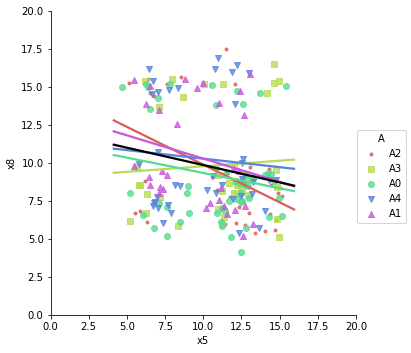

In [41]:
# look at the first of the random selection
view_to_plot = view_sample_bin.loc[view_sample_bin.index[0],['feat1','feat2','group_feat']]

labeled_df_bin.sp_plot(*view_to_plot)

and a view where we know there is strong SP

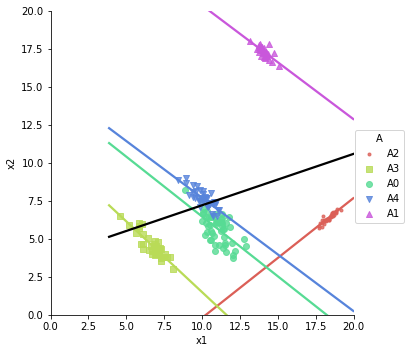

In [42]:

labeled_df_bin.sp_plot('x1','x2','A')

Next we compute the trends using the continuous trends,, and view a sample of 10 random trends

In [43]:
view_sample_dist = labeled_df_dist.get_subgroup_trends_1lev(distance_trend_objs).sample(10)
view_sample_dist

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
2897,x8,x15,D,D3,1.647295,0.239476,lin_reg,-0.063852,0.039237
1736,x5,x6,C,C0,-0.370568,0.352524,lin_reg,-0.145677,0.141093
3137,x9,x16,A,A1,0.310990,0.421502,lin_reg,0.029962,0.027745
982,x3,x5,F,F2,-0.078165,0.084822,lin_reg,-0.141693,0.134436
2119,x6,x8,B,B2,0.228919,0.180946,lin_reg,0.121622,0.108267
2002,x5,x14,E,E0,-0.043699,0.061870,lin_reg,0.084633,0.112907
1979,x5,x13,H,H0,-0.040842,0.030649,lin_reg,-0.092046,0.068803
3087,x9,x14,D,D1,-0.119706,0.313396,lin_reg,-0.001977,0.003836
2570,x7,x13,C,C2,0.613952,0.440377,lin_reg,0.205941,0.105972
3235,x10,x13,A,A3,0.425235,0.214323,lin_reg,-0.182615,0.093544


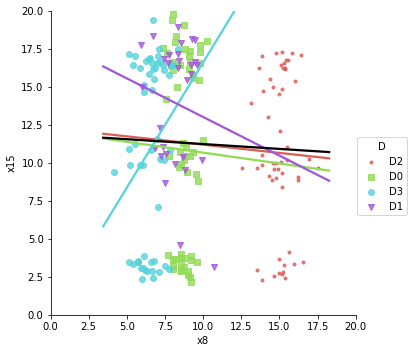

In [44]:
# look at the first of the random selection
view_to_plot = view_sample_dist.loc[view_sample_dist.index[0],['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)

Now, we can filter each table for Simpson's Paradox, using the default setting for each

In [97]:
bin_sp = labeled_df_bin.get_SP_rows('SP')
print(len(bin_sp))
quality_filters = {'name':'SP_qualfilt','distance':.33,'agg_trend_quality':.25,'subgroup_trend_quality':0.25,}
bin_sp_qual = labeled_df_bin.get_SP_rows(quality_filters.copy(),replace=True)
print(len(bin_sp_qual))
bin_sp_qual.head()

1364
11


,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP,SP_qualfilt
0,x1,x2,A,A0,negative,0.619519,binary_sign,positive,0.306508,1,True,True
1,x1,x2,A,A1,negative,0.735432,binary_sign,positive,0.306508,1,True,True
3,x1,x2,A,A3,negative,0.877537,binary_sign,positive,0.306508,1,True,True
4,x1,x2,A,A4,negative,0.797354,binary_sign,positive,0.306508,1,True,True
2417,x7,x8,D,D3,negative,0.450748,binary_sign,positive,0.664258,1,True,True


We get a lot of reslts, but a lot are for weak trends

In [98]:
quality_filters

{'agg_trend_quality': 0.25,
 'distance': 0.33,
 'name': 'SP_qualfilt',
 'subgroup_trend_quality': 0.25}

In [99]:
dist_sp = labeled_df_dist.get_SP_rows(thresh = .2)
print(len(dist_sp))
dist_sp_qual = labeled_df_dist.get_SP_rows(quality_filters.copy(),replace=True)
print(len(dist_sp_qual))
dist_sp_qual.head()

695
12


,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP_thresh0.2,SP_qualfilt
0,x1,x2,A,A0,-0.787160,0.619519,lin_reg,0.338248,0.306508,0.632182,True,True
1,x1,x2,A,A1,-0.749743,0.735432,lin_reg,0.338248,0.306508,0.617205,True,True
3,x1,x2,A,A3,-0.930993,0.877537,lin_reg,0.338248,0.306508,0.684904,True,True
4,x1,x2,A,A4,-0.746163,0.797354,lin_reg,0.338248,0.306508,0.615744,True,True
1446,x4,x8,B,B1,-1.014637,0.333738,lin_reg,-0.245206,0.251795,0.351542,True,True


Many fewer, and with a threshold on aggregate trend strength, even fewer. We can visually inspect some of the trends that only the binary detector finds and that only the distance based finds

In [100]:
# unique to bin
dist_det = dist_sp_qual.index
bin_det = bin_sp_qual.index
bin_only= [b for b in bin_det if not(b in dist_det)]
print(len(bin_only))
# randomly select one
cursel = np.random.random_integers(len(bin_only)) -1

view_to_plot = labeled_df_bin.result_df.loc[bin_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_bin.result_df.loc[bin_only[cursel],'subgroup']

labeled_df_bin.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_bin.result_df.loc[bin_only[cursel]] #,'subgroup']

0


/home/smb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 0 + 1) instead
  import sys


ValueError: Range cannot be empty (low >= high) unless no samples are taken

1


/home/smb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 1 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


feat1                           x4
feat2                           x8
group_feat                       B
subgroup                        B1
subgroup_trend            -1.01464
subgroup_trend_quality    0.333738
trend_type                 lin_reg
agg_trend                -0.245206
agg_trend_quality         0.251795
distance                  0.351542
SP_thresh0.2                  True
SP_qualfilt                   True
Name: 1446, dtype: object

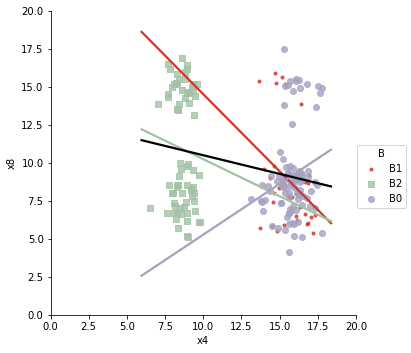

In [101]:
dist_only = [d for d in dist_det if not(d in bin_det)]
print(len(dist_only))
cursel = np.random.random_integers(len(dist_only)) -1
view_to_plot = labeled_df_dist.result_df.loc[dist_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_dist.result_df.loc[dist_only[cursel],'subgroup']

labeled_df_dist.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_dist.result_df.loc[dist_only[cursel]]

The trends that only the distance finds are cases where the subgroup trend is the same sign as aggregate, but significantly different.  So, we find fewer overall and additional interesting trends that binary sign change cannot find. 

In [60]:
# we can check how many in each case were designed in, once we filter in the labeled df ro explose get views for a dtafram
n_view = 8
# in this synthetic dataset we know the structure of the SP designed views
designed_view_list = [('x'+str(i+1),'x'+str(i+2),c) for i,c in 
                      zip(range(0,n_view*2,2),list(string.ascii_uppercase[:n_view]))]
num_designed_views = len(designed_view_list)

# passing the name of the SP we already detected, doesn't compute the detection over, it filters by that column
found_sp_views_bin = labeled_df_bin.get_SP_views('SP_qualfilt',colored=True)
found_sp_views_dist = labeled_df_dist.get_SP_views('SP_qualfilt',colored=True)

In [61]:
# of designed, how many were found
detections_bin = [v for v in designed_view_list if v in found_sp_views_bin]
num_detections_bin = len(detections_bin)
# of found, how many were not designed
undesigned_bin = [v for v in found_sp_views_bin if not(v in designed_view_list)]
num_undesigned_bin = len(undesigned_bin)
print('Success Rate: ',num_detections_bin /num_designed_views)
print('Novel Discoveries of detections: ',num_undesigned_bin /len(found_sp_views_bin))

Success Rate:  0.5
Novel Discoveries of detections:  0.6


In [62]:
# of designed, how many were found
detections_dist = [v for v in designed_view_list if v in found_sp_views_dist]
num_detections_dist = len(detections_dist)
# of found, how many were not designed
undesigned_dist = [v for v in found_sp_views_dist if not(v in designed_view_list)]
num_undesigned_dist = len(undesigned_dist)
print('Success Rate: ',num_detections_dist /num_designed_views)
print('Novel Discoveries: ',num_undesigned_dist /len(found_sp_views_dist))

Success Rate:  0.5
Novel Discoveries:  0.6923076923076923


Some of the designed views may not have any SP, due to the random nature and the quality threshold

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP_thresh0.2,SP_qualfilt
933,x3,x4,B,B0,-0.480173,0.541724,lin_reg,-0.057529,0.045828,0.248406,True,False
934,x3,x4,B,B1,-0.563321,0.653498,lin_reg,-0.057529,0.045828,0.290011,True,False
935,x3,x4,B,B2,-0.698477,0.682078,lin_reg,-0.057529,0.045828,0.351565,True,False
1736,x5,x6,C,C0,-0.370568,0.352524,lin_reg,-0.145677,0.141093,0.133830,False,False
1737,x5,x6,C,C1,0.206839,0.188577,lin_reg,-0.145677,0.141093,0.221940,True,False
1738,x5,x6,C,C2,-0.378754,0.420788,lin_reg,-0.145677,0.141093,0.138400,False,False
1739,x5,x6,C,C3,-0.459381,0.441546,lin_reg,-0.145677,0.141093,0.182053,False,False
1740,x5,x6,C,C4,-0.733976,0.592701,lin_reg,-0.145677,0.141093,0.310993,True,False
1741,x5,x6,C,C5,0.538345,0.541175,lin_reg,-0.145677,0.141093,0.406488,True,False
340,x1,x12,F,F0,-0.003860,0.014384,lin_reg,-0.048789,0.102402,0.028578,False,False


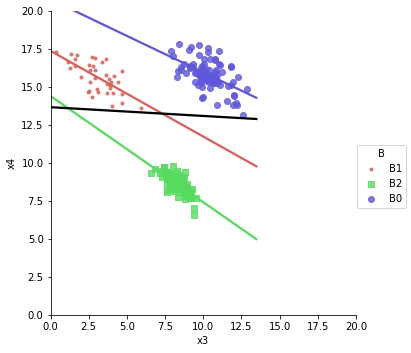

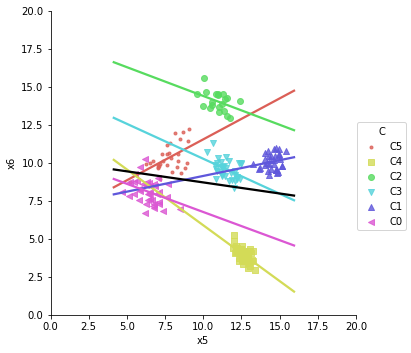

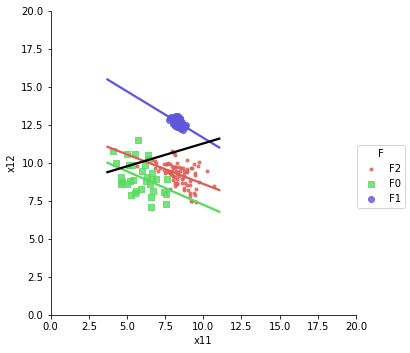

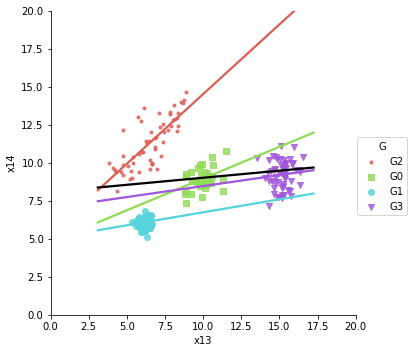

In [63]:
missed_list = [v for v in designed_view_list if not(v in found_sp_views_dist) and not(v in found_sp_views_bin)]

missed_row_df = []
for view_to_plot in missed_list:
    labeled_df_dist.sp_plot(*view_to_plot)
    missed_row_df.append(labeled_df_dist.get_trend_rows(*view_to_plot))
    
feat1_missed,feat2_missed,groupby_missed = zip(*missed_list)
# labeled_df_dist.get_trend_rows(feat1_missed,feat2_missed,groupby_missed)
pd.concat(missed_row_df)

By inspection, we see that the missed ones are all weak in either aggregate or subgroup trend.  Even if there is a reversal, weak trends shouldn't be used to make decsions anyway, so these are not important for further exploration

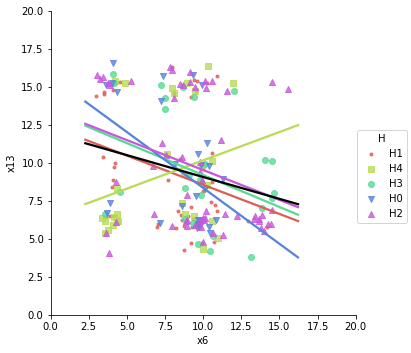

In [73]:
view_to_plot = random.choice(undesigned_bin)
labeled_df_bin.sp_plot(*view_to_plot)

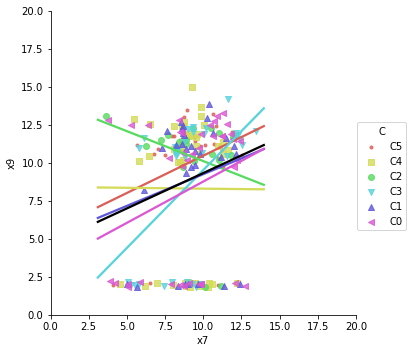

In [74]:
view_to_plot = random.choice(undesigned_bin)
labeled_df_bin.sp_plot(*view_to_plot)

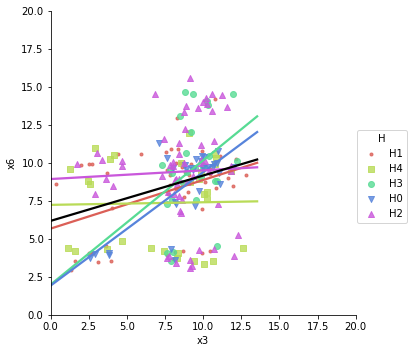

In [75]:
view_to_plot = random.choice(undesigned_dist)
labeled_df_dist.sp_plot(*view_to_plot)

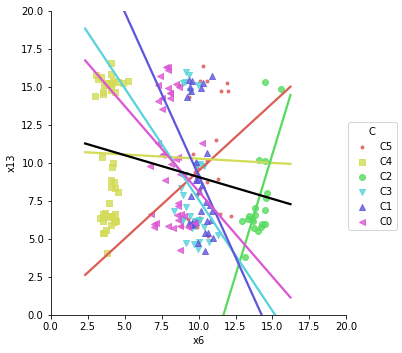

In [76]:
view_to_plot = random.choice(undesigned_dist)
labeled_df_dist.sp_plot(*view_to_plot)

For the continuous-valued, we can futher filter 

## Rank SP

# Two types of SP

In [ ]:
np.prod([True, True, True])

In [ ]:
filter_thresh = {'distance':0,'agg_trend_quality':0,'subgroup_trend_quality':0}
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

labeled_df_bin.result_df[labeled_df_bin.result_df.apply(q_filter,axis=1)]

In [ ]:
filter_thresh = {'distance':.2,'agg_trend_quality':.15,'subgroup_trend_quality':0,'name':'def'}
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

In [ ]:

filter_thresh = quality_filters.copy()
filter_thresh.pop('name')

In [ ]:
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

len(labeled_df_dist.result_df[labeled_df_dist.result_df.apply(q_filter,axis=1)])